***Clean-Up of the trigger event variables***

In [1]:
import pandas as pd
import numpy as np
import os
import json
import requests
import matplotlib as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pycountry

start with the UCDP data

# 1. UCDP

In [2]:
#set in the params, what i want to get, but dont i need to flatten the data first?
#import requests, math
#url="https://ucdpapi.pcr.uu.se/api/gedevents/23.1?pagesize=100"
#datasets_per_request=100
#data_count =316818

#print("Data to be Downloaded: ", data_count)


# Start with an empty list
#total_results = []
# do paging correctly
# using limit and offset system query option
#request_count = math.ceil(data_count / datasets_per_request)
#print("Numbers of requests: ", request_count)

#for i in range(0, request_count):
 #   request_params = {
  #      "limit": datasets_per_request,
   #     "offset": i* datasets_per_request
    #}
 # trying to do the Requests 10 times:
    #for i in range(10):
     #   try : # catch connection Error if it appears
      #      response = requests.get(url, params=request_params)
       #     print(response.status_code)
        #    print(response.headers)
         #   break # exit for loop when successfull
        #except requests.ConnectionError:
         #   print("Request failed. trying again")
          #  continue

    #print('got data from: ', response.url)
    #data = response.json()#['results']

    #total_results.append(data)

#print("We have", len(total_results), "total results")

In [3]:
#total_results

In [4]:
#parse into a dataframe
#data = pd.DataFrame(total_results['Result'])
#print(data)

In [5]:
os.getcwd()

'C:\\Users\\cecilianatalie.strom\\GitHub\\INSA\\IV'

In [6]:
#load data from the csv created
data = pd.read_csv("GEDEvent_v23_1.csv")

In [7]:
# receiving the fist x rows of the dataframe
display(data.head())
#receiving the first 2 rows of the dataframe
display(data.head(2))
#get the name of all columns
print(data.columns)

#check for missingness
is_null = data.isnull().sum()
display(is_null)

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1.0,259.0,259.0,Iraq: Government,524.0,...,2017-07-31 00:00:00.000,0.0,4.0,0.0,2.0,6.0,6.0,6.0,645.0,NaN
1,412700,IRQ-2021-1-524-145,2021,1,Clear,1.0,259.0,259.0,Iraq: Government,524.0,...,2021-08-26 00:00:00.000,13.0,1.0,141.0,28.0,183.0,184.0,171.0,645.0,NaN
2,413023,IRQ-2021-1-524-143,2021,1,Clear,1.0,259.0,259.0,Iraq: Government,524.0,...,2021-08-28 00:00:00.000,0.0,2.0,0.0,0.0,2.0,3.0,0.0,645.0,NaN
3,412909,IRQ-2021-1-524-144,2021,1,Clear,1.0,259.0,259.0,Iraq: Government,524.0,...,2021-08-29 00:00:00.000,0.0,0.0,10.0,0.0,10.0,10.0,9.0,645.0,NaN
4,132140,AFG-1989-1-411-2,1989,1,Clear,1.0,333.0,333.0,Afghanistan: Government,724.0,...,1989-01-13 00:00:00.000,6.0,0.0,0.0,0.0,6.0,6.0,6.0,700.0,NaN


,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1.0,259.0,259.0,Iraq: Government,524.0,...,2017-07-31 00:00:00.000,0.0,4.0,0.0,2.0,6.0,6.0,6.0,645.0,NaN
1,412700,IRQ-2021-1-524-145,2021,1,Clear,1.0,259.0,259.0,Iraq: Government,524.0,...,2021-08-26 00:00:00.000,13.0,1.0,141.0,28.0,183.0,184.0,171.0,645.0,NaN


Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')


id                       0
relid                    0
year                     0
active_year              0
code_status              0
type_of_violence         1
conflict_dset_id         1
conflict_new_id          1
conflict_name            1
dyad_dset_id             1
dyad_new_id              1
dyad_name                1
side_a_dset_id           1
side_a_new_id            1
side_a                   1
side_b_dset_id           1
side_b_new_id            1
side_b                   1
number_of_sources        1
source_article           1
source_office        33751
source_date          33751
source_headline      33751
source_original      10912
where_prec               1
where_coordinates        1
where_description     1133
adm_1                11573
adm_2                25455
latitude                 1
longitude                1
geom_wkt                 1
priogrid_gid             1
country                  1
country_id               1
region                   1
event_clarity            1
d

In [8]:
#filtering data can be done through the filter function
data_ucdp= data.filter(['id', 'relid', 'year', 'type_of_violence', 'country', 'country_id','date_start', 'date_end', 'best','gwnoa', 'gwnob'])
display(data_ucdp)
#rename & select columns
data_ucdp = data_ucdp.rename(columns= {'best':'fatality_best_estimate'})


,id,relid,year,type_of_violence,country,country_id,date_start,date_end,best,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1.0,Afghanistan,700.0,2017-07-31 00:00:00.000,2017-07-31 00:00:00.000,6.0,645.0,NaN
1,412700,IRQ-2021-1-524-145,2021,1.0,Afghanistan,700.0,2021-08-26 00:00:00.000,2021-08-26 00:00:00.000,183.0,645.0,NaN
2,413023,IRQ-2021-1-524-143,2021,1.0,Afghanistan,700.0,2021-08-28 00:00:00.000,2021-08-28 00:00:00.000,2.0,645.0,NaN
3,412909,IRQ-2021-1-524-144,2021,1.0,Afghanistan,700.0,2021-08-29 00:00:00.000,2021-08-29 00:00:00.000,10.0,645.0,NaN
4,132140,AFG-1989-1-411-2,1989,1.0,Afghanistan,700.0,1989-01-07 00:00:00.000,1989-01-13 00:00:00.000,6.0,700.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
91650,445124,ETH-2022-1-16240-104,2022,1.0,Ethiopia,530.0,2022-08-14 00:00:00.000,2022-08-15 00:00:00.000,0.0,530.0,NaN
91651,446094,ETH-2022-1-16240-110.1,2022,1.0,Ethiopia,530.0,2022-08-20 00:00:00.000,2022-08-21 00:00:00.000,0.0,530.0,NaN
91652,446095,ETH-2022-1-16240-110.2,2022,1.0,Ethiopia,530.0,2022-08-20 00:00:00.000,2022-08-21 00:00:00.000,0.0,530.0,NaN
91653,446096,ETH-2022-1-16240-110.3,2022,1.0,Ethiopia,530.0,2022-08-20 00:00:00.000,2022-08-21 00:00:00.000,0.0,530.0,NaN


In [9]:
#match te start and end dates to find differences
data_ucdp['date_start'].equals(data_ucdp['date_end'])

False

In [10]:
data_ucdp['check'] = data_ucdp['date_start'].isin(data_ucdp['date_end'])
data_ucdp.check

0        True
1        True
2        True
3        True
4        True
         ... 
91650    True
91651    True
91652    True
91653    True
91654    True
Name: check, Length: 91655, dtype: bool

In [11]:
test = data_ucdp[data_ucdp['check'] == False]
test
#the check has given us the indication, that the start and end date of the events 
#are mostly the same day, so we can use one column as event column

,id,relid,year,type_of_violence,country,country_id,date_start,date_end,fatality_best_estimate,gwnoa,gwnob,check
6,130359,AFG-1989-1-411-4,1989,1.0,Afghanistan,700.0,1989-01-23 00:00:00.000,1989-01-24 00:00:00.000,600.0,700.0,NaN,False
7,133883,AFG-1989-1-411-39,1989,1.0,Afghanistan,700.0,1989-01-30 00:00:00.000,1989-02-05 00:00:00.000,2.0,700.0,NaN,False
58,134329,AFG-1990-1-411-5,1990,1.0,Afghanistan,700.0,1990-07-13 00:00:00.000,1990-07-15 00:00:00.000,15.0,700.0,NaN,False
99,134447,AFG-1991-1-412-9,1991,1.0,Afghanistan,700.0,1991-08-01 00:00:00.000,1991-08-30 00:00:00.000,100.0,700.0,NaN,False
400,142200,AFG-1989-1-760-612,1989,1.0,Afghanistan,700.0,1989-03-01 00:00:00.000,1989-03-31 00:00:00.000,6.0,700.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
90948,34112,ETH-1992-2-35-3,1992,2.0,Ethiopia,530.0,1992-01-01 00:00:00.000,1992-01-20 00:00:00.000,181.0,NaN,NaN,False
90977,34300,ETH-2003-2-52-4,2003,2.0,Ethiopia,530.0,2003-07-24 00:00:00.000,2003-08-19 00:00:00.000,17.0,NaN,NaN,False
91090,34022,ETH-1989-2-193-1,1989,2.0,Ethiopia,530.0,1989-03-01 00:00:00.000,1989-03-31 00:00:00.000,16.0,NaN,NaN,False
91091,34021,ETH-1991-2-193-1,1991,2.0,Ethiopia,530.0,1991-11-08 00:00:00.000,1991-11-14 00:00:00.000,25.0,NaN,NaN,False


In [12]:
test

,id,relid,year,type_of_violence,country,country_id,date_start,date_end,fatality_best_estimate,gwnoa,gwnob,check
6,130359,AFG-1989-1-411-4,1989,1.0,Afghanistan,700.0,1989-01-23 00:00:00.000,1989-01-24 00:00:00.000,600.0,700.0,NaN,False
7,133883,AFG-1989-1-411-39,1989,1.0,Afghanistan,700.0,1989-01-30 00:00:00.000,1989-02-05 00:00:00.000,2.0,700.0,NaN,False
58,134329,AFG-1990-1-411-5,1990,1.0,Afghanistan,700.0,1990-07-13 00:00:00.000,1990-07-15 00:00:00.000,15.0,700.0,NaN,False
99,134447,AFG-1991-1-412-9,1991,1.0,Afghanistan,700.0,1991-08-01 00:00:00.000,1991-08-30 00:00:00.000,100.0,700.0,NaN,False
400,142200,AFG-1989-1-760-612,1989,1.0,Afghanistan,700.0,1989-03-01 00:00:00.000,1989-03-31 00:00:00.000,6.0,700.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
90948,34112,ETH-1992-2-35-3,1992,2.0,Ethiopia,530.0,1992-01-01 00:00:00.000,1992-01-20 00:00:00.000,181.0,NaN,NaN,False
90977,34300,ETH-2003-2-52-4,2003,2.0,Ethiopia,530.0,2003-07-24 00:00:00.000,2003-08-19 00:00:00.000,17.0,NaN,NaN,False
91090,34022,ETH-1989-2-193-1,1989,2.0,Ethiopia,530.0,1989-03-01 00:00:00.000,1989-03-31 00:00:00.000,16.0,NaN,NaN,False
91091,34021,ETH-1991-2-193-1,1991,2.0,Ethiopia,530.0,1991-11-08 00:00:00.000,1991-11-14 00:00:00.000,25.0,NaN,NaN,False


In [13]:
#filter years to only contain 2020 - 2023
data_ucdp = data_ucdp[data_ucdp['year'] > 2019]
#create an event column based on the start and end date 
data_ucdp['conflict_event'] = data_ucdp['date_start'].copy()
data_ucdp = data_ucdp.drop(columns=['date_start','check','date_end'])

In [14]:
data_ucdp['year'].unique()

array([2021, 2020, 2022], dtype=int64)

In [15]:
#pip install pycountry

In [16]:
#add iso3 codes
##mport the function
def findCountryAlpha3 (country_name):
    """Producing current iso alpha 3 codes from standardized country names"""
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return ('')

##create iso codes
data_ucdp['iso'] = data_ucdp.apply(lambda row: findCountryAlpha3(row.country), axis=1)

##check the uniqueness and coverage of the iso codes
inspect = data_ucdp[data_ucdp['iso'].isna()]
print(inspect['iso'].unique())

list_iso = list(data_ucdp.iso)
list_iso = list( dict.fromkeys(list_iso) )
display(list_iso)

[]


['AFG',
 'DZA',
 'AGO',
 'ARM',
 'AUT',
 'AZE',
 'BGD',
 'BEN',
 '',
 'BRA',
 'BFA',
 'BDI',
 'CMR',
 'CAF',
 'TCD',
 'COL',
 'COG',
 'DJI',
 'ECU',
 'EGY',
 'SLV',
 'ERI',
 'ETH']

In [17]:
inspect

,id,relid,year,type_of_violence,country,country_id,fatality_best_estimate,gwnoa,gwnob,conflict_event,iso


In [18]:
#inspect the iso codes and ensure their correctness
iso = data_ucdp = data_ucdp[data_ucdp['iso'] == '']
iso

,id,relid,year,type_of_violence,country,country_id,fatality_best_estimate,gwnoa,gwnob,conflict_event,iso
49662,450724,BRA-2021-2-15142-278,2021,2.0,Bolivia,145.0,1.0,NaN,NaN,2021-04-22 00:00:00.000,
79800,348985,UGA-2020-1-688-0,2020,1.0,DR Congo (Zaire),490.0,2.0,500.0,NaN,2020-07-23 00:00:00.000,
80006,425460,UGA-2021-1-689-0,2021,1.0,DR Congo (Zaire),490.0,2.0,500.0,NaN,2021-12-20 00:00:00.000,
80051,336347,DRC-2020-1-894-0,2020,1.0,DR Congo (Zaire),490.0,3.0,490.0,NaN,2020-03-30 00:00:00.000,
80052,339064,DRC-2020-1-894-1,2020,1.0,DR Congo (Zaire),490.0,4.0,490.0,NaN,2020-04-13 00:00:00.000,
...,...,...,...,...,...,...,...,...,...,...,...
86691,457014,DRC-2022-2-17417-2,2022,2.0,DR Congo (Zaire),490.0,1.0,NaN,NaN,2022-12-06 00:00:00.000,
86692,460604,DRC-2022-2-17417-6,2022,2.0,DR Congo (Zaire),490.0,6.0,NaN,NaN,2022-12-18 00:00:00.000,
86693,460623,DRC-2022-2-17417-0,2022,2.0,DR Congo (Zaire),490.0,4.0,NaN,NaN,2022-12-19 00:00:00.000,
86694,460325,DRC-2022-2-17417-5,2022,2.0,DR Congo (Zaire),490.0,13.0,NaN,NaN,2022-12-29 00:00:00.000,


In [19]:
iso.country.unique()

array(['Bolivia', 'DR Congo (Zaire)', nan], dtype=object)

In [20]:
#add the iso codes for the countriesthat were missed
data_ucdp.loc[data_ucdp['country'] == "Cote d'Ivoire", 'iso'] = 'CIV'
data_ucdp.loc[data_ucdp['country'] == "Ivory Coast", 'iso'] = 'CIV'
data_ucdp.loc[data_ucdp['country'] == 'Bolivia','iso']= 'BOL'
data_ucdp.loc[data_ucdp['country'] == 'DR Congo (Zaire)','iso']= 'COD'
data_ucdp.loc[data_ucdp['country'] == 'Iran','iso']= 'IRN'
data_ucdp.loc[data_ucdp['country'] == 'Kingdom of eSwatini (Swaziland)','iso']='SWZ'
data_ucdp.loc[data_ucdp['country'] == 'Madagascar (Malagasy)','iso']= 'MDG'
data_ucdp.loc[data_ucdp['country'] == 'Myanmar (Burma)','iso']= 'MMR'
data_ucdp.loc[data_ucdp['country'] == 'Russia (Soviet Union)','iso']= 'RUS'
data_ucdp.loc[data_ucdp['country'] == 'Syria','iso']='SYR'
data_ucdp.loc[data_ucdp['country'] == 'Tanzania','iso']= 'TZA'
data_ucdp.loc[data_ucdp['country'] == 'Turkey','iso']='TUR'
data_ucdp.loc[data_ucdp['country'] == 'United States of America','iso']= 'USA'
data_ucdp.loc[data_ucdp['country'] == 'Venezuela','iso']= 'VEN'
data_ucdp.loc[data_ucdp['country'] == 'Yemen (North Yemen)','iso']='YEM'
data_ucdp.loc[data_ucdp['country'] == 'Zimbabwe (Rhodesia)','iso']= 'ZWE'

In [21]:
data_ucdp

,id,relid,year,type_of_violence,country,country_id,fatality_best_estimate,gwnoa,gwnob,conflict_event,iso
49662,450724,BRA-2021-2-15142-278,2021,2.0,Bolivia,145.0,1.0,NaN,NaN,2021-04-22 00:00:00.000,BOL
79800,348985,UGA-2020-1-688-0,2020,1.0,DR Congo (Zaire),490.0,2.0,500.0,NaN,2020-07-23 00:00:00.000,COD
80006,425460,UGA-2021-1-689-0,2021,1.0,DR Congo (Zaire),490.0,2.0,500.0,NaN,2021-12-20 00:00:00.000,COD
80051,336347,DRC-2020-1-894-0,2020,1.0,DR Congo (Zaire),490.0,3.0,490.0,NaN,2020-03-30 00:00:00.000,COD
80052,339064,DRC-2020-1-894-1,2020,1.0,DR Congo (Zaire),490.0,4.0,490.0,NaN,2020-04-13 00:00:00.000,COD
...,...,...,...,...,...,...,...,...,...,...,...
86691,457014,DRC-2022-2-17417-2,2022,2.0,DR Congo (Zaire),490.0,1.0,NaN,NaN,2022-12-06 00:00:00.000,COD
86692,460604,DRC-2022-2-17417-6,2022,2.0,DR Congo (Zaire),490.0,6.0,NaN,NaN,2022-12-18 00:00:00.000,COD
86693,460623,DRC-2022-2-17417-0,2022,2.0,DR Congo (Zaire),490.0,4.0,NaN,NaN,2022-12-19 00:00:00.000,COD
86694,460325,DRC-2022-2-17417-5,2022,2.0,DR Congo (Zaire),490.0,13.0,NaN,NaN,2022-12-29 00:00:00.000,COD


In [22]:
data_ucdp.type_of_violence.unique()

array([ 2.,  1.,  3., nan])

In [23]:
#filter for type 3 violence as os violence
data_os = data_ucdp[data_ucdp['type_of_violence'] == 3]
display(data_os)

,id,relid,year,type_of_violence,country,country_id,fatality_best_estimate,gwnoa,gwnob,conflict_event,iso
80776,347337,DRC-2020-3-934-47,2020,3.0,DR Congo (Zaire),490.0,1.0,490.0,NaN,2020-01-12 00:00:00.000,COD
80777,325408,DRC-2020-3-934-0,2020,3.0,DR Congo (Zaire),490.0,2.0,490.0,NaN,2020-01-20 00:00:00.000,COD
80778,332713,DRC-2020-3-934-3,2020,3.0,DR Congo (Zaire),490.0,1.0,490.0,NaN,2020-02-01 00:00:00.000,COD
80779,332700,DRC-2020-3-934-2,2020,3.0,DR Congo (Zaire),490.0,1.0,490.0,NaN,2020-02-10 00:00:00.000,COD
80780,332749,DRC-2020-3-934-4,2020,3.0,DR Congo (Zaire),490.0,1.0,490.0,NaN,2020-02-14 00:00:00.000,COD
...,...,...,...,...,...,...,...,...,...,...,...
86526,414838,DRC-2021-3-16802-1,2021,3.0,DR Congo (Zaire),490.0,2.0,NaN,NaN,2021-09-06 00:00:00.000,COD
86527,414857,DRC-2021-3-16802-2,2021,3.0,DR Congo (Zaire),490.0,2.0,NaN,NaN,2021-09-11 00:00:00.000,COD
86528,430046,DRC-2022-3-16802-0,2022,3.0,DR Congo (Zaire),490.0,18.0,NaN,NaN,2022-02-15 00:00:00.000,COD
86529,434264,DRC-2022-3-16802-1,2022,3.0,DR Congo (Zaire),490.0,7.0,NaN,NaN,2022-03-13 00:00:00.000,COD


In [24]:
#safe as new dfs
data_os.to_csv("ucdp_os.csv")
data_ucdp.to_csv("ucdp_cleaned.csv")

In [25]:
#group by the country_id and country
data_ucdp=data_ucdp.groupby(['year','iso']).sum().reset_index()
display(data_ucdp)

,year,iso,id,relid,type_of_violence,country,country_id,fatality_best_estimate,gwnoa,gwnob,conflict_event
0,2020,COD,292520578,UGA-2020-1-688-0DRC-2020-1-894-0DRC-2020-1-894...,1888.0,DR Congo (Zaire)DR Congo (Zaire)DR Congo (Zair...,404740.0,3984.0,153987.0,0.0,2020-07-23 00:00:00.0002020-03-30 00:00:00.000...
1,2021,BOL,450724,BRA-2021-2-15142-278,2.0,Bolivia,145.0,1.0,0.0,0.0,2021-04-22 00:00:00.000
2,2021,COD,329592965,UGA-2021-1-689-0DRC-2021-3-934-0DRC-2021-3-934...,1841.0,DR Congo (Zaire)DR Congo (Zaire)DR Congo (Zair...,395430.0,3722.0,167447.0,0.0,2021-12-20 00:00:00.0002021-01-08 00:00:00.000...
3,2022,,446097,ETH-2022-1-16240-111,0.0,0,0.0,0.0,0.0,0.0,0
4,2022,COD,517697928,DRC-2022-3-934-0DRC-2022-3-934-1DRC-2022-3-934...,2866.0,DR Congo (Zaire)DR Congo (Zaire)DR Congo (Zair...,570850.0,5543.0,174959.0,0.0,2022-01-02 00:00:00.0002022-01-03 00:00:00.000...


In [26]:
#get descriptives and plot the data
print(data_ucdp.describe())

#simple temporal plot of fatalities

#heatmap of fatalities per countries over time

#top 10 countries

             year            id  type_of_violence     country_id  \
count     5.00000  5.000000e+00          5.000000       5.000000   
mean   2021.20000  2.281417e+08       1319.400000  274233.000000   
std       0.83666  2.247044e+08       1271.190702  259822.249134   
min    2020.00000  4.460970e+05          0.000000       0.000000   
25%    2021.00000  4.507240e+05          2.000000     145.000000   
50%    2021.00000  2.925206e+08       1841.000000  395430.000000   
75%    2022.00000  3.295930e+08       1888.000000  404740.000000   
max    2022.00000  5.176979e+08       2866.000000  570850.000000   

       fatality_best_estimate          gwnoa  gwnob  
count                5.000000       5.000000    5.0  
mean              2650.000000   99278.600000    0.0  
std               2516.837798   90939.462789    0.0  
min                  0.000000       0.000000    0.0  
25%                  1.000000       0.000000    0.0  
50%               3722.000000  153987.000000    0.0  
75%      

# 2. Global Terror INDEX

In [27]:
#load as xlsx file
data = pd.ExcelFile('GTI_renamed.xlsx')
#need to load individual years as individual sheets
df3 = pd.read_excel(data, sheet_name="2022",skiprows=5)
df3['year'] = 2022
df3.groupby(['year','iso3c']).sum()
print(df3)
df2 = pd.read_excel(data, sheet_name="2021",skiprows=5)
df2['year'] = 2021
df2.groupby(['year','iso3c']).sum()
print(df2)
df1 = pd.read_excel(data, sheet_name="2020",skiprows=5)
df1['year'] = 2020
df1.groupby(['year','iso3c']).sum()
print(df1)

     Unnamed: 0 iso3c              Country  Rank     Score  Incidents  \
0           NaN   AFG          Afghanistan     1  8.822244        225   
1           NaN   BFA         Burkina Faso     2  8.564101        310   
2           NaN   SOM              Somalia     3  8.463031        299   
3           NaN   MLI                 Mali     4  8.412392        272   
4           NaN   SYR                Syria     5  8.161243        197   
..          ...   ...                  ...   ...       ...        ...   
158         NaN   TKM         Turkmenistan    93  0.000000          0   
159         NaN   TLS          Timor-Leste    93  0.000000          0   
160         NaN   TTO  Trinidad and Tobago    93  0.000000          0   
161         NaN   ZMB               Zambia    93  0.000000          0   
162         NaN   ZWE             Zimbabwe    93  0.000000          0   

     Fatalities  Injuries  Hostages  year  
0           633       897         0  2022  
1          1135       496        84

In [28]:
#join all of the together to proceed
data_gti = pd.merge(df1,df2,how="outer")
data_gti = pd.merge(data_gti,df3,how="outer")
data_gti

,Unnamed: 0,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,year
0,NaN,AFG,Afghanistan,1,9.056336,643,1292,2395,101,2020
1,NaN,IRQ,Iraq,2,8.699259,637,464,748,32,2020
2,NaN,SOM,Somalia,3,8.489523,344,671,491,4,2020
3,NaN,NGA,Nigeria,4,8.434954,142,865,204,419,2020
4,NaN,SYR,Syria,5,8.315132,450,746,1076,15,2020
...,...,...,...,...,...,...,...,...,...,...
484,NaN,TKM,Turkmenistan,93,0.000000,0,0,0,0,2022
485,NaN,TLS,Timor-Leste,93,0.000000,0,0,0,0,2022
486,NaN,TTO,Trinidad and Tobago,93,0.000000,0,0,0,0,2022
487,NaN,ZMB,Zambia,93,0.000000,0,0,0,0,2022


In [29]:
display(data_gti.head())
print(data_gti.columns)
#check for missingness
is_null = data_gti.isnull().sum()
display(is_null)

,Unnamed: 0,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,year
0,NaN,AFG,Afghanistan,1,9.056336,643,1292,2395,101,2020
1,NaN,IRQ,Iraq,2,8.699259,637,464,748,32,2020
2,NaN,SOM,Somalia,3,8.489523,344,671,491,4,2020
3,NaN,NGA,Nigeria,4,8.434954,142,865,204,419,2020
4,NaN,SYR,Syria,5,8.315132,450,746,1076,15,2020


Index(['Unnamed: 0', 'iso3c', 'Country', 'Rank', 'Score', 'Incidents',
       'Fatalities', 'Injuries', 'Hostages', 'year'],
      dtype='object')


Unnamed: 0    489
iso3c           0
Country         0
Rank            0
Score           0
Incidents       0
Fatalities      0
Injuries        0
Hostages        0
year            0
dtype: int64

In [30]:
#now filter and potentially rename the columns
data_gti = data_gti.drop('Unnamed: 0',axis='columns')
data_gti = data_gti.rename(columns={'iso3c':'iso', 'Country':'country_name', 'Rank':'gti_rank', 'Score':'gti_score','Incidents':'gti_incident_count','Fatalities':'gti_fat_count', 'Injuries':'gti_injured_count','Hostages':'gti_hostage_count'})
display(data_gti)

,iso,country_name,gti_rank,gti_score,gti_incident_count,gti_fat_count,gti_injured_count,gti_hostage_count,year
0,AFG,Afghanistan,1,9.056336,643,1292,2395,101,2020
1,IRQ,Iraq,2,8.699259,637,464,748,32,2020
2,SOM,Somalia,3,8.489523,344,671,491,4,2020
3,NGA,Nigeria,4,8.434954,142,865,204,419,2020
4,SYR,Syria,5,8.315132,450,746,1076,15,2020
...,...,...,...,...,...,...,...,...,...
484,TKM,Turkmenistan,93,0.000000,0,0,0,0,2022
485,TLS,Timor-Leste,93,0.000000,0,0,0,0,2022
486,TTO,Trinidad and Tobago,93,0.000000,0,0,0,0,2022
487,ZMB,Zambia,93,0.000000,0,0,0,0,2022


In [31]:
#group the data and create the iso codes if needed
data_gti = data_gti.groupby(['year','iso']).sum()
display(data_gti)
data_gti.reset_index()

country_name  gti_rank  gti_score  gti_incident_count  \
year iso                                                                      
2020 AFG               Afghanistan         1   9.056336                 643   
     AGO                   Vietnam        89   0.681852                   0   
     ALB                      Togo       105   0.000000                   0   
     ARE                   Albania       105   0.000000                   0   
     ARG  Central African Republic        66   2.460256                   0   
...                            ...       ...        ...                 ...   
2022 VNM                   Vietnam        89   0.226891                   0   
     YEM                     Yemen        22   5.616402                   9   
     ZAF              South Africa        79   0.826319                   0   
     ZMB                    Zambia        93   0.000000                   0   
     ZWE                  Zimbabwe        93   0.000000                   0   

          gti_fat_count  gti_injured_count  gti_hostage_count  
year iso                                                       
2020 AFG           1292               2395                101  
     AGO              0                  0                  0  
     ALB              0                  0                  0  
     ARE              0                  0                  0  
     ARG              0                  0                  0  
...                 ...                ...                ...  
2022 VNM              0                  0                  0  
     YEM             19                 23                  5  
     ZAF              0                  0                  0  
     ZMB              0                  0                  0  
     ZWE              0                  0                  0  

[489 rows x 7 columns]

,year,iso,country_name,gti_rank,gti_score,gti_incident_count,gti_fat_count,gti_injured_count,gti_hostage_count
0,2020,AFG,Afghanistan,1,9.056336,643,1292,2395,101
1,2020,AGO,Vietnam,89,0.681852,0,0,0,0
2,2020,ALB,Togo,105,0.000000,0,0,0,0
3,2020,ARE,Albania,105,0.000000,0,0,0,0
4,2020,ARG,Central African Republic,66,2.460256,0,0,0,0
...,...,...,...,...,...,...,...,...,...
484,2022,VNM,Vietnam,89,0.226891,0,0,0,0
485,2022,YEM,Yemen,22,5.616402,9,19,23,5
486,2022,ZAF,South Africa,79,0.826319,0,0,0,0
487,2022,ZMB,Zambia,93,0.000000,0,0,0,0


In [32]:
#describe and plot the data
#get descriptives and plot the data
print(data_gti.describe())

#simple temporal plot of fatalities

#heatmap of fatalities per countries over time

#top 10 countries

         gti_rank   gti_score  gti_incident_count  gti_fat_count  \
count  489.000000  489.000000          489.000000     489.000000   
mean    68.676892    2.258682           28.505112      43.889571   
std     32.390893    2.672987          103.667919     164.734511   
min      1.000000    0.000000            0.000000       0.000000   
25%     41.000000    0.000000            0.000000       0.000000   
50%     82.000000    1.005884            0.000000       0.000000   
75%     96.000000    4.218670            3.000000       1.000000   
max    105.000000    9.130089          889.000000    1499.000000   

       gti_injured_count  gti_hostage_count  
count         489.000000         489.000000  
mean           42.813906           4.566462  
std           195.376696          25.616741  
min             0.000000           0.000000  
25%             0.000000           0.000000  
50%             0.000000           0.000000  
75%             1.000000           0.000000  
max          2395.0

In [33]:
#save as csv
data_gti.to_csv("data_gti.csv")

 # 3. Coup Data

In [34]:
data_coup=pd.read_csv("raw_coup_data.csv")

In [35]:
display(data_coup.head())
print(data_coup.columns)
#check for missingness
is_null = data_coup.isnull().sum()
display(is_null)

,coup_id,cowcode,country,year,month,day,event_type,unrealized,realized,conspiracy,...,counter,other,noharm,injured,killed,harrest,jailed,tried,fled,exile
0,70003101963,700,Afghanistan,1963,3,10,coup,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,70007171973,700,Afghanistan,1973,7,17,coup,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,70009201973,700,Afghanistan,1973,9,20,attempted,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,70011261976,700,Afghanistan,1976,11,26,conspiracy,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,70004271978,700,Afghanistan,1978,4,27,coup,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Index(['coup_id', 'cowcode', 'country', 'year', 'month', 'day', 'event_type',
       'unrealized', 'realized', 'conspiracy', 'attempt', 'military',
       'dissident', 'rebel', 'palace', 'foreign', 'auto', 'resign', 'popular',
       'counter', 'other', 'noharm', 'injured', 'killed', 'harrest', 'jailed',
       'tried', 'fled', 'exile'],
      dtype='object')


coup_id       0
cowcode       0
country       0
year          0
month         0
day           0
event_type    0
unrealized    0
realized      0
conspiracy    0
attempt       0
military      0
dissident     0
rebel         0
palace        0
foreign       0
auto          0
resign        0
popular       0
counter       0
other         0
noharm        0
injured       0
killed        0
harrest       0
jailed        0
tried         0
fled          0
exile         0
dtype: int64

In [36]:
#check that all the years I need are represented
list1 = list[data_coup.year.unique()]
list1

list[array([1963, 1973, 1976, 1978, 1979, 1990, 1992, 1996, 2001, 2021, 1946,
       1998, 1962, 1964, 1965, 1967, 1991, 1994, 2019, 1975, 1977, 1951,
       1952, 1955, 1956, 1957, 1960, 1961, 1966, 1970, 1971, 1981, 1982,
       1987, 1988, 2016, 1995, 2005, 2011, 2007, 2012, 1969, 1972, 1947,
       1950, 1953, 1958, 1959, 1968, 1974, 1980, 1984, 1945, 2022, 1989,
       1983, 2003, 2014, 2015, 1993, 2006, 1997, 2000, 2002, 2008, 2013,
       1948, 1949, 1999, 1954, 2004, 1986, 2020, 2009, 1985, 2010, 2018,
       2017], dtype=int64)]

In [37]:
data_coup.day

0      10
1      17
2      20
3      26
4      27
       ..
976    28
977    11
978    10
979    29
980    15
Name: day, Length: 981, dtype: int64

In [38]:
#now filter and potentially rename the columns
data_coup = data_coup.filter(['cowcode', 'country', 'year', 'month', 'day', 'event_type',
       'unrealized', 'realized', 'conspiracy', 'attempt', 'military',
       'dissident', 'rebel', 'palace', 'foreign', 'auto', 'resign', 'popular',
       'counter', 'other', 'noharm', 'injured', 'killed', 'harrest', 'jailed',
       'tried', 'fled', 'exile'])
data_coup=data_coup.rename(columns={'day':'date','unrealized':"coup_unrealized_count",'realized':"coup_realized_count", 'conspiracy':"coup_conspira_count", 'attempt':"coup_attempt_count", 'military':'coup_milit_count','dissident':"coup_dissident_count", 'rebel':"coup_rebel_count", 'palace':"coup_palace_count", 'foreign':"coup_foreign_count", 'auto':"coup_auto_count", 'resign':"coup_resign_count", 'popular':"coup_popular_count",'counter':"coup_counter_count", 'other':"coup_other_count", 'noharm':"coup_noharm_count", 'injured':"coup_injured_count", 'killed':"coup_killed_count", 'harrest':"coup_housearrest_count", 'jailed':"coup_jailed_count",'tried':"coup_tried_count", 'fled':"coup_fled_count", 'exile':'coup_exile_count'})
print(data_coup.columns)

Index(['cowcode', 'country', 'year', 'month', 'date', 'event_type',
       'coup_unrealized_count', 'coup_realized_count', 'coup_conspira_count',
       'coup_attempt_count', 'coup_milit_count', 'coup_dissident_count',
       'coup_rebel_count', 'coup_palace_count', 'coup_foreign_count',
       'coup_auto_count', 'coup_resign_count', 'coup_popular_count',
       'coup_counter_count', 'coup_other_count', 'coup_noharm_count',
       'coup_injured_count', 'coup_killed_count', 'coup_housearrest_count',
       'coup_jailed_count', 'coup_tried_count', 'coup_fled_count',
       'coup_exile_count'],
      dtype='object')


In [39]:
#now filter to only contain years from 2020 onwards
data_coup = data_coup[data_coup['year'] > 2019]
#make a YYYYMMDD format columns 
from datetime import date
coup_event = []
for y, m, d in zip(data_coup.year, data_coup.month, data_coup.date):
    coup_event.append(date(y, m, d))
data_coup['coup_event'] = coup_event
display(data_coup)

,cowcode,country,year,month,date,event_type,coup_unrealized_count,coup_realized_count,coup_conspira_count,coup_attempt_count,...,coup_other_count,coup_noharm_count,coup_injured_count,coup_killed_count,coup_housearrest_count,coup_jailed_count,coup_tried_count,coup_fled_count,coup_exile_count,coup_event
11,700,Afghanistan,2021,8,15,coup,0,1,0,0,...,0,1,0,0,0,0,0,1,0,2021-08-15
66,370,Belarus,2021,7,5,conspiracy,1,0,1,0,...,0,1,0,0,0,0,0,0,0,2021-07-05
122,140,Brazil,2022,12,29,attempted,1,0,0,1,...,0,1,0,0,0,0,0,0,0,2022-12-29
136,439,Burkina Faso,2022,1,8,conspiracy,1,0,1,0,...,0,1,0,0,0,0,0,0,0,2022-01-08
137,439,Burkina Faso,2022,1,24,coup,0,1,0,0,...,0,1,0,0,1,1,0,0,0,2022-01-24
138,439,Burkina Faso,2022,9,30,coup,0,1,0,0,...,0,1,0,0,0,0,0,0,1,2022-09-30
171,482,Central African Republic,2021,1,13,attempted,1,0,0,1,...,0,1,0,0,0,0,0,0,0,2021-01-13
186,483,Chad,2021,4,21,coup,0,1,0,0,...,0,0,0,1,0,0,0,0,0,2021-04-21
263,490,Democratic Republic of the Congo,2022,2,8,conspiracy,1,0,1,0,...,0,1,0,0,0,0,0,0,0,2022-02-08
313,92,El Salvador,2020,2,9,attempted,1,0,0,1,...,0,1,0,0,0,0,0,0,0,2020-02-09


In [40]:
#create a variable containing the sum
data_coup["coup_summed"] = data_coup[['coup_unrealized_count', 'coup_realized_count', 'coup_conspira_count',
       'coup_attempt_count', 'coup_milit_count', 'coup_dissident_count',
       'coup_rebel_count', 'coup_palace_count', 'coup_foreign_count',
       'coup_auto_count', 'coup_resign_count', 'coup_popular_count',
       'coup_counter_count', 'coup_other_count']].astype(float).sum(1)
data_coup.coup_summed

11     2.0
66     3.0
122    3.0
136    3.0
137    2.0
138    2.0
171    4.0
186    3.0
263    3.0
313    4.0
342    4.0
351    5.0
414    3.0
497    3.0
498    6.0
499    2.0
580    2.0
581    2.0
582    4.0
611    2.0
630    3.0
655    3.0
699    3.0
755    4.0
756    4.0
791    2.0
820    4.0
821    2.0
905    2.0
930    4.0
932    4.0
Name: coup_summed, dtype: float64

In [41]:
#group the data and create the iso codes if needed
#add iso3 codes
def findCountryAlpha3 (country_name):
    """Producing current iso alpha 3 codes from standardized country names"""
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return ('')

##create iso codes
data_coup['iso'] = data_coup.apply(lambda row: findCountryAlpha3(row.country), axis=1)

##check the uniqueness and coverage of the iso codes
inspect = data_coup[data_coup['iso'].isna()]
inspect['iso'].unique()

list_iso = list(data_coup.iso)
list_iso = list( dict.fromkeys(list_iso) )
display(list_iso)

['AFG',
 'BLR',
 'BRA',
 'BFA',
 'CAF',
 'TCD',
 '',
 'SLV',
 'GMB',
 'DEU',
 'GNB',
 'JOR',
 'KAZ',
 'MLI',
 'MMR',
 'NER',
 'PAK',
 'PER',
 'STP',
 'SAU',
 'LKA',
 'SDN',
 'TUN',
 'UKR',
 'USA']

In [42]:
iso = data_coup[data_coup['iso'] == '']
print(iso)
##set iso manually for countries that were missed
data_coup.loc[data_coup['country'] == "Democratic Republic of the Congo", 'iso'] = 'COD'

     cowcode                           country  year  month  date  event_type  \
263      490  Democratic Republic of the Congo  2022      2     8  conspiracy   

     coup_unrealized_count  coup_realized_count  coup_conspira_count  \
263                      1                    0                    1   

     coup_attempt_count  ...  coup_injured_count  coup_killed_count  \
263                   0  ...                   0                  0   

     coup_housearrest_count  coup_jailed_count  coup_tried_count  \
263                       0                  0                 0   

     coup_fled_count  coup_exile_count  coup_event  coup_summed  iso  
263                0                 0  2022-02-08          3.0       

[1 rows x 31 columns]


<Axes: xlabel='year', ylabel='coup_summed'>

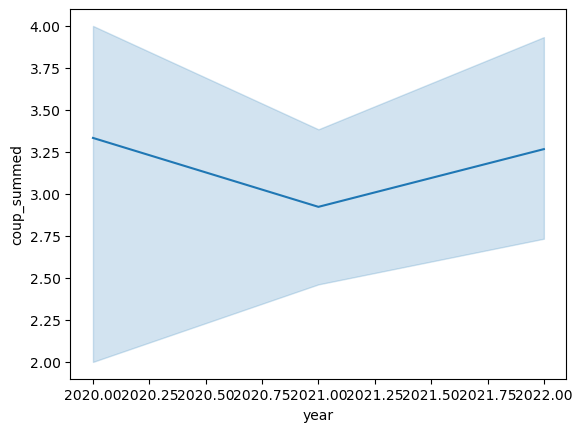

In [43]:
#simple temporal plot of coups
plot1 = sns.lineplot(data=data_coup,x='year',y='coup_summed')
plot1

In [44]:
#heatmap of coups per countries over time
heatmap = data_coup.pivot(index="iso", columns="coup_summed", values="year")
plo2 = sns.heatmap(heatmap)
plot2


ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
#top 10 countries
#time trend of the data
grouped = data_coup.groupby(['iso','year']).agg({'coup_summed': 'sum'})
top_countries = grouped.groupby('iso').agg({'coup_summed': 'sum'}).nlargest(5, 'coup_summed').index.tolist()
filtered = grouped[grouped.index.get_level_values('iso').isin(top_countries)]

pivoted = filtered.reset_index().pivot(index='year', columns='iso', values='coup_summed')
pivoted.plot.area(stacked=False)
plt.xlabel('Year')
plt.ylabel('number of coups')
plt.savefig('timetrend_coups.png')
# Show the plot
plt.show()

In [ ]:
#describe and plot the data
#get descriptives and plot the data
print(data_coup.describe())

In [ ]:
#save as csv
data_coup.to_csv("coup_data.csv")

# 4. ACLED#

In [ ]:
acled = pd.read_csv('acled_protest.csv')
acled

In [ ]:
acled.event_id_cnty.nunique()

In [ ]:
print(acled.columns)
acled=acled.filter(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'country', 'fatalities'])
#transform to datetime format
acled['protest_event_date'] = pd.to_datetime(acled['event_date'], format="mixed")
#get month_id
acled['month'] = pd.to_datetime(acled['protest_event_date']).dt.to_period('M')
#create event count
acled['event_count']= acled['event_id_cnty'].groupby(acled['month']).transform('nunique')
display(acled)

In [ ]:
acled.to_csv('acled_clean.csv')